We'll be performing Exploratory Data Analysis on a CSV of car advertisements provided to us.  We'll start by importing our libraries and reading in our CSV file.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("../vehicles_us.csv")

Let's examine the contents of our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
display(df.head(10))
df.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [6]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

We can see that each line in our DataFrame represents an individual car that was advertised for sale.  The information includes the price, model and year, condition of the vehicle, some technical specifics and classifications, and the color of the vehicle.  We also have information as to when the vehicle was posted for sale and for how long the vehicle was listed before being sold.

We'll first check for duplicated rows before filling in our missing values.

In [7]:
df.duplicated().sum()

0

In [8]:
# do more here

Let's tackle our categorical variables first.  We'll fill things such as missing `paint_color` or `model_year` values as `unspecified` or `unknown`.

In [9]:
df['paint_color'] = df['paint_color'].fillna('unspecified')

In [10]:
df['model_year'] = df['model_year'].fillna('unknown')

Our `is_4wd` appears to be a boolean column.  Let's check what values we currently have.

In [11]:
df['is_4wd'].unique()

array([ 1., nan])

In this case, the `1` represents a vehicle that is 4 wheel drive, while a missing value represents a vehicle that is not.  Let's fill our missing values with 0 and convert this column to integers.

In [12]:
#can we do more here?  By matching model and model years, is it possible to fill in "1" for certain vehicles that may have a NaN value, rather than filling all with 0?

In [13]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [14]:
np.array_equal(df['is_4wd'], df['is_4wd'].astype(int))

True

In [15]:
df['is_4wd'] = df['is_4wd'].astype(int)

We now just need to fill in our `cylinders` and `odometer` missing values.

In [16]:
#what value should we use for missing cylinders?  Do we leave fill these in at all?

In [17]:
#odometer column // same question

Let's take a look at our DataFrame's info and a sample once more now that our values have been adjusted.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  object 
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  int32  
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int32(1), int64(2), object(8)
memory usage: 4.9+ MB


In [19]:
df.sample(20, random_state=1234)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
4794,16900,2011.0,chevrolet silverado,like new,8.0,gas,59914.0,automatic,truck,silver,1,2018-07-16,8
30638,2999,2004.0,toyota highlander,good,6.0,gas,214258.0,automatic,SUV,black,0,2018-12-22,36
31670,5495,2009.0,toyota corolla,good,4.0,gas,171694.0,automatic,sedan,unspecified,0,2018-06-08,16
32168,9999,2008.0,nissan frontier,excellent,6.0,gas,98598.0,automatic,pickup,silver,0,2018-07-26,10
37775,16995,2010.0,chevrolet silverado 2500hd,excellent,8.0,gas,104750.0,automatic,truck,blue,1,2018-05-27,20
10884,1,2014.0,toyota 4runner,excellent,6.0,gas,69153.0,automatic,SUV,blue,1,2018-10-27,32
45835,18995,2011.0,chevrolet silverado,like new,8.0,gas,89049.0,automatic,truck,grey,1,2018-11-10,6
6916,24700,2017.0,chevrolet traverse,excellent,6.0,gas,27792.0,automatic,SUV,silver,0,2019-03-05,6
21243,26900,2016.0,ram 2500,excellent,NaN,diesel,184800.0,automatic,truck,unspecified,1,2018-11-01,37
37179,3500,2004.0,subaru outback,good,4.0,gas,222000.0,manual,hatchback,green,1,2019-03-01,62


In [20]:
df['price'].isna().sum()

0

Let's take a look at how our mileage relates to price below.

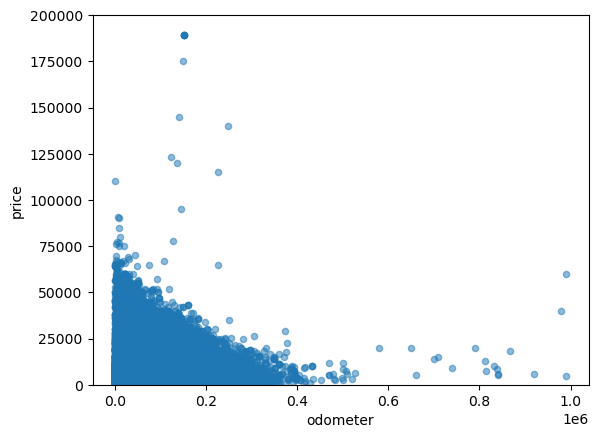

In [30]:
df.plot(
    kind='scatter',
    x='odometer',
    y='price',
    ylim=(0,200000),
    alpha=0.5
)

plt.show()